<a href="https://colab.research.google.com/github/Tahimi/convectionDiffusion/blob/main/lake_contourPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

finalDistributionCSVFile = '/content/drive/MyDrive/UFAL/advection_diffusion/FiniteDiference_FipyFiniteVolume/lakePoluantFinalDistribution.csv'
df = pd.read_csv(finalDistributionCSVFile, usecols = ['x', 'y', 'z'])
print(len(df['x']))
df.head(4)

6516


,x,y,z
0,1476.994502,300.530549,0.096795
1,939.189257,1110.202170,0.479844
2,1740.675557,307.084900,0.176142
3,1713.724608,80.370519,0.518251


In [3]:
# irregular data
x = df['x']
y = df['y']
z = df['z']

xm, xM = x.min(), x.max()
ym, yM = y.min(), y.max()
zm, zM = z.min(), z.max()

In [4]:
import numpy as np

# regular grid vertices over the data
xr = np.linspace(xm, xM, 200)
yr = np.linspace(ym, yM, 100)
[X, Y] = np.meshgrid(xr, yr)

In [5]:
from scipy.interpolate import griddata

# z-values at the regular grid vertices through cubic interpolation
zr = griddata((x, y), z, (X, Y) , method='linear')
print('zr.shape = ', zr.shape)

zr.shape =  (100, 200)


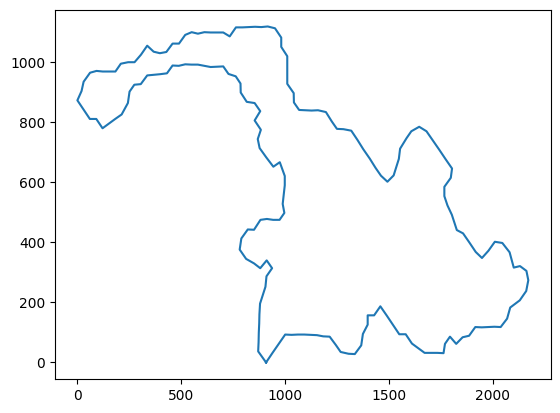

In [6]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# read lack boundary vertices and make a shapely polygon
lakeBoundaryVertices = '/content/drive/MyDrive/UFAL/advection_diffusion/FiniteDiference_FipyFiniteVolume/lakeBoundaryVerticesCleaned.csv'
dfLakeBoundaryPolygonVertices = pd.read_csv(lakeBoundaryVertices, usecols = ['x', 'y'])

vertices = list(map(tuple, np.asarray(dfLakeBoundaryPolygonVertices)))
lakeBoundaryPolygon = Polygon(vertices)

# plotting the lake boundary polygon
x,y = lakeBoundaryPolygon.exterior.xy
plt.plot(x,y)
plt.show()

In [7]:
# make a mask for the regular grid points that lays inside the lake
from shapely.geometry import Point

contains = np.vectorize(lambda p: lakeBoundaryPolygon.contains(Point(p)), signature='(n)->()')
pointcoords = np.array((X,Y)).T.reshape(-1, 2)
lakeMask = contains(pointcoords)
print('lakeMask.shape = ', lakeMask.shape)

lakeMask.shape =  (20000,)


In [8]:
#!pip install -U kaleido # this is needed for exporting the image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import plotly.graph_objects as go

Z = np.copy(zr)
Z = Z.T.reshape(-1, 1)
Z[~lakeMask] = np.nan
Z = Z.reshape(200,100).T
#print('Z.shape = ', Z.shape)

fig = go.Figure(data = go.Contour(x = xr, y = yr, z = Z, colorscale='Jet',
                                  contours=dict(start=np.nanmin(Z),
                                                end=np.nanmax(Z), size=0.2)))
fig.update_layout(title_text='Contour plot for the poluente distribution',
                  title_x=0.5,
                  width=800, height=500)
fig.show()

# exporting the image into the drive
poluenteDistrContourPlot = '/content/drive/MyDrive/UFAL/advection_diffusion/FiniteDiference_FipyFiniteVolume/poluenteDistrContourPlot.png'
fig.write_image(poluenteDistrContourPlot)

In [20]:
# Built-in Continuous Color Scales in Python Plotly
import plotly.express as px

fig = px.colors.sequential.swatches_continuous()
fig.show()